## Exploratory Plotting with pandas

Results from the class with a few extras.

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

#### Read demography data.

In [2]:
df = pd.read_csv("demography.csv", index_col=0)
df.head(3)

,year,population,fertility,life_exp
country,,,,
Afghanistan,1800,3280000.0,7.0,28.21
Afghanistan,1801,NaN,7.0,28.20
Afghanistan,1802,NaN,7.0,28.19


### Line Plot

Many plotting questions hide behind data wrangling questions.
Even for a simple line plot, you need to:

- place the year in the index (so that) it is used for the x-axis
- remove missing values

In [3]:
ger = df.loc["Germany"].set_index("year")
ger.head(3)

,population,fertility,life_exp
year,,,
1800,22886919.0,5.40,38.37
1801,NaN,5.40,38.37
1802,NaN,5.39,38.37


<Axes: xlabel='year'>

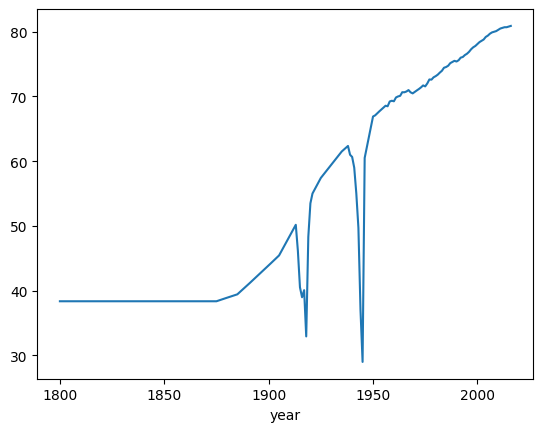

In [4]:
# only remove rows after column selection, otherwise we would lose 
# life exp data where population is missing
ger["life_exp"].dropna().plot.line()

With three countries, you get a legend box for free, but each contry needs its own column.
The `.unstack()` unpivots the data.

<Axes: xlabel='year'>

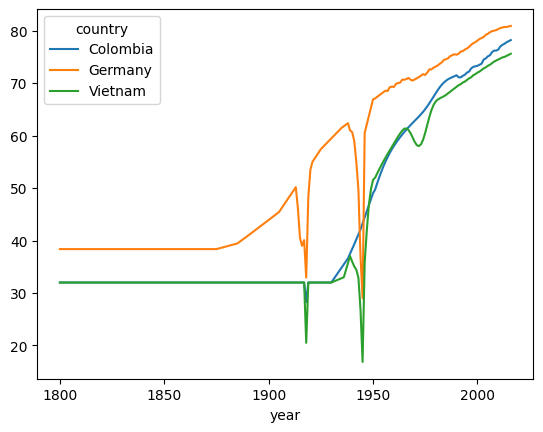

In [5]:
df2 = df.loc[["Germany", "Vietnam", "Colombia"]]        # select 3 countries
df2 = df2.reset_index().set_index(["year", "country"])  # create duplicate index
df2 = df2["life_exp"].unstack().dropna()                # unpivot and remove missing data
df2.plot()

### Bar Plot

Bar plots are generally easier to create. If you manage to condense the data to few rows/cols, you can make a bar plot.

In [6]:
first5 = df[df["year"] == 2000].dropna().head(5)
first5

,year,population,fertility,life_exp
country,,,,
Afghanistan,2000,19701940.0,7.73,50.1
Albania,2000,3121965.0,2.38,74.7
Algeria,2000,31183658.0,2.51,73.3
Angola,2000,15058638.0,6.84,52.3
Antigua and Barbuda,2000,77648.0,2.32,73.8


<Axes: ylabel='country'>

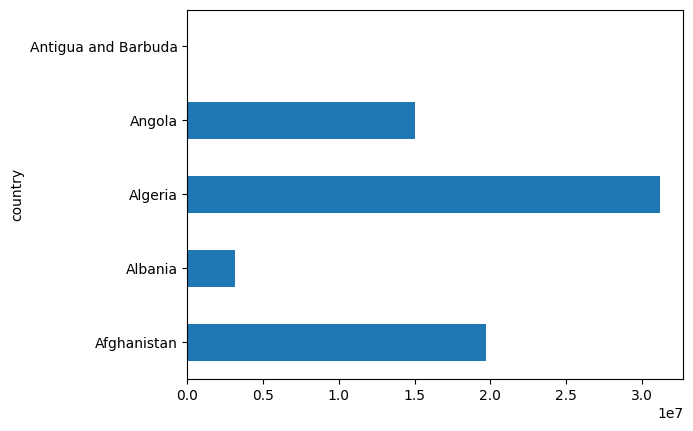

In [ ]:
first5["population"].plot.barh()  # or bar() for vertical bars
# plt.axis((2, 7, -1, 6))         # cutting off bars is often misleading

### Histogram

The population is stretched over many orders of magnitude. In that situation you may want to log-normalize the data so that you get a more centered distribution (plotting on a log scale also works).

<Axes: xlabel='logpop', ylabel='Count'>

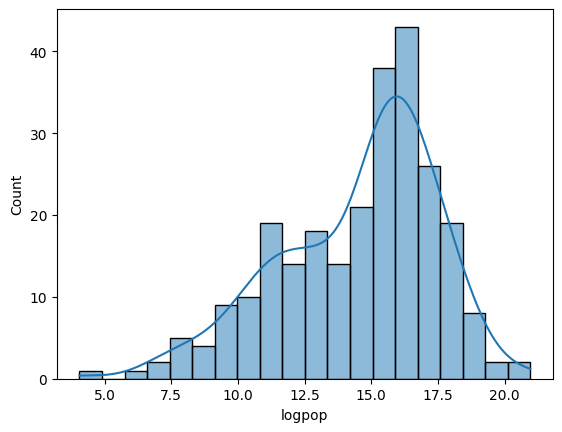

In [ ]:
# df["fertility"].plot.hist(bins=20)  # usually no good

# normalize population data
df2 = df[df["year"] == 2000][["population"]].dropna()
df2["logpop"] = np.log(df2["population"])

sns.histplot(data=df2, x="logpop", bins=20, kde=True)

### Scatter Plot

<Axes: xlabel='life_exp', ylabel='fertility'>

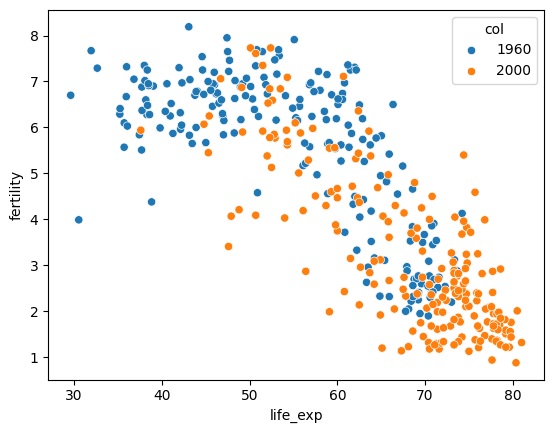

In [ ]:
# some data wrangling to compare two years
old = df[df["year"] == 1960].copy()
new = df[df["year"] == 2000].copy()
total = pd.concat([old, new]).dropna()
total["col"] = total["year"].astype(str)  # integers as color info suck
total.head()

sns.scatterplot(data=total, 
    x="life_exp",
    y="fertility",
    hue="col",
)